In [1]:
# -*- coding: utf-8 -*-
#import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from DynamicLoop import DynamicLoop
#zhfont1 = mpl.font_manager.FontProperties(fname='C:\\Windows\\Fonts\\simsun.ttc',size=12)

In [2]:
import glob
import os
from file_sort_method import *

In [3]:
g345files = glob.glob('dl_G345/datas/0.1hz/*.csv')
g345files.sort(key=force_of_file)
g375files = glob.glob('dl_G375/datas/0.1hz/*.csv')
g375files.sort(key=force_of_file)
g375_1_files = glob.glob('dl_G375_1/datas/0.1hz/*.csv')
g375_1_files.sort(key=force_of_file)

In [13]:
def mdr_gen(files):
    data_dict = {}
    plt.figure(figsize=(16,20),dpi=300)
    for p in range(1,6):
        sigma_m = [0]
        epsilon_m = [0]
        sigma_m_byfit = [0]
        epsilon_m_byfit = [0]
        modulus = [0]
        damping_ratio = [0]
        modulus_byfit = [0]
        damping_ratio_byfit = [0]
        for f in files:
            df = pd.read_csv(f, encoding='gb2312')
            loop = DynamicLoop(df['epsilon_d'][p*50:p*50+50], df['sigma_d'][p*50:p*50+50])
            epsilon_m.append(loop.epsilon_m())
            sigma_m.append(loop.sigma_m())
            epsilon_m_byfit.append(loop.epsilon_m_byfit())
            sigma_m_byfit.append(loop.sigma_m_byfit())
            modulus.append(loop.modulus())
            damping_ratio.append(loop.damping_ratio())
            modulus_byfit.append(loop.modulus_byfit())
            damping_ratio_byfit.append(loop.damping_ratio_byfit())

            plt.subplot(5,2,p*2-1)
            loop.plot_to_center(plot_fit=False)
            plt.xlabel(r'$\varepsilon_d$', fontsize=16)
            plt.ylabel(r'$\sigma_d$ / kPa', fontsize=16)
            plt.title('@period {0}'.format(p+1))
            plt.subplot(5,2,p*2)
            loop.plot_to_center(plot_loop=False)
            plt.xlabel(r'$\varepsilon_d$', fontsize=16)
            plt.ylabel(r'$\sigma_d$ / kPa', fontsize=16)
            plt.title('@period {0}'.format(p+1))
            #plt.axis([-0.0008, 0.0008, -150, 150])

        tmp_dict = {(p+1, 'epsilon_m'):epsilon_m,
                    (p+1, 'sigma_m'):sigma_m,
                    (p+1, 'modulus'):modulus,
                    (p+1, 'damping_ratio'):damping_ratio,
                    (p+1, 'epsilon_m_byfit'):epsilon_m_byfit,
                    (p+1, 'sigma_m_byfit'):sigma_m_byfit,
                    (p+1, 'modulus_byfit'):modulus_byfit,
                    (p+1, 'damping_ratio_byfit'):damping_ratio_byfit}
        data_dict.update(tmp_dict)

        xm = max(epsilon_m)
        ym = max(sigma_m)
        xylim = [-xm*1.25, xm*1.25, -ym*1.2, ym*1.2]
        
        plt.subplot(5,2,p*2-1)
        bb, = plt.plot(epsilon_m, sigma_m, 'go-', label='backbone curve')
        plt.axis(xylim)
        plt.legend(loc=0, handles=[bb])
        
        plt.subplot(5,2,p*2)
        bb, = plt.plot(epsilon_m_byfit, sigma_m_byfit, 'go-', label='backbone curve')
        plt.axis(xylim)
        plt.legend(loc=0, handles=[bb])
        
    modulus_and_damping_ratio = pd.DataFrame(data_dict)
    filedir = os.path.dirname(f)
    topath = os.path.dirname(filedir)
    modulus_and_damping_ratio.to_csv(os.path.join(topath,'modulus_and_damping_ratio.csv'), index=False)

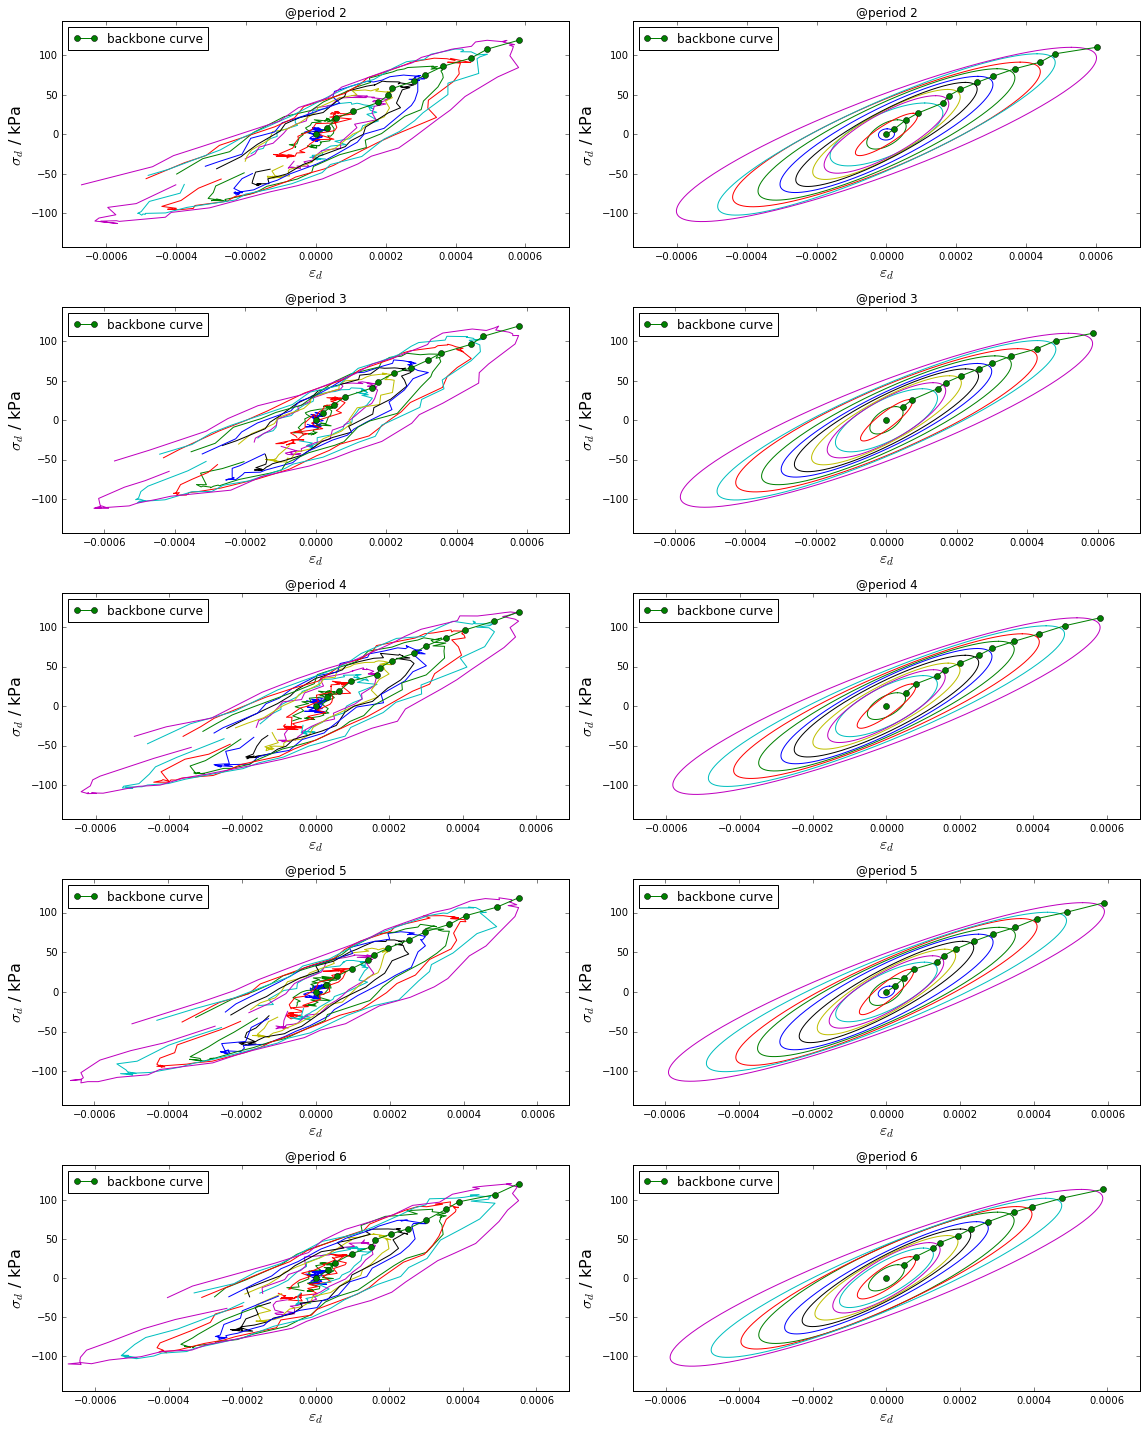

In [14]:
mdr_gen(g345files)
plt.tight_layout()
plt.savefig('figs/g345_loops.svg')

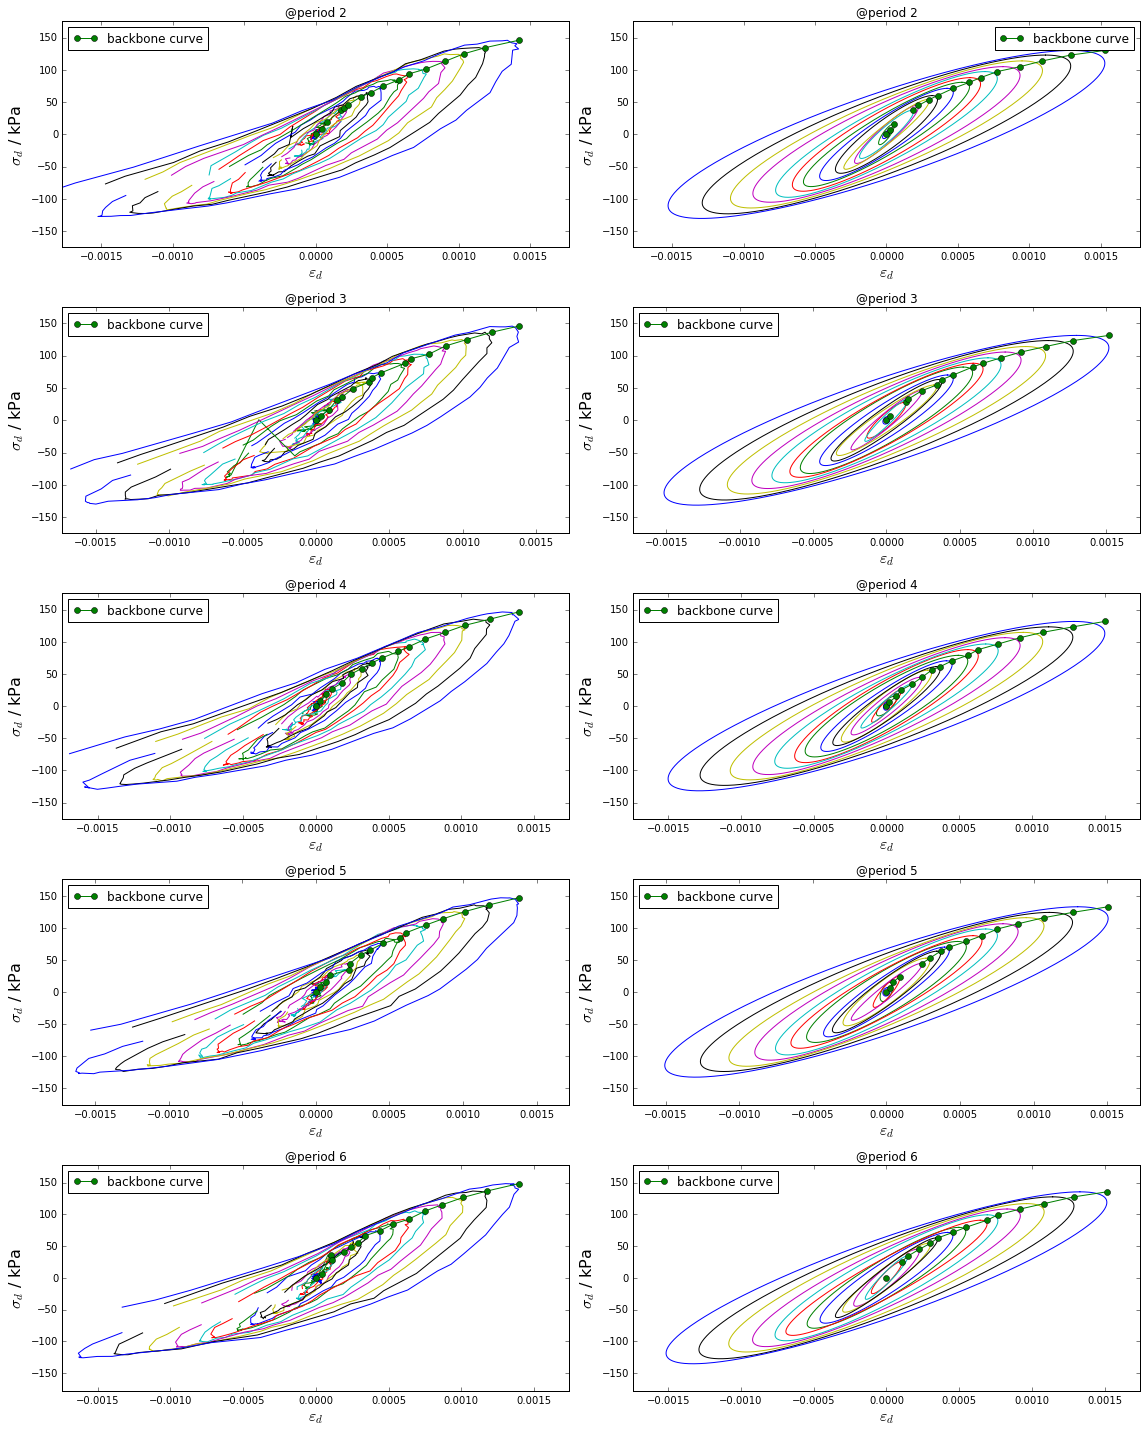

In [15]:
mdr_gen(g375files)
plt.tight_layout()
plt.savefig('figs/g375_loops.svg')

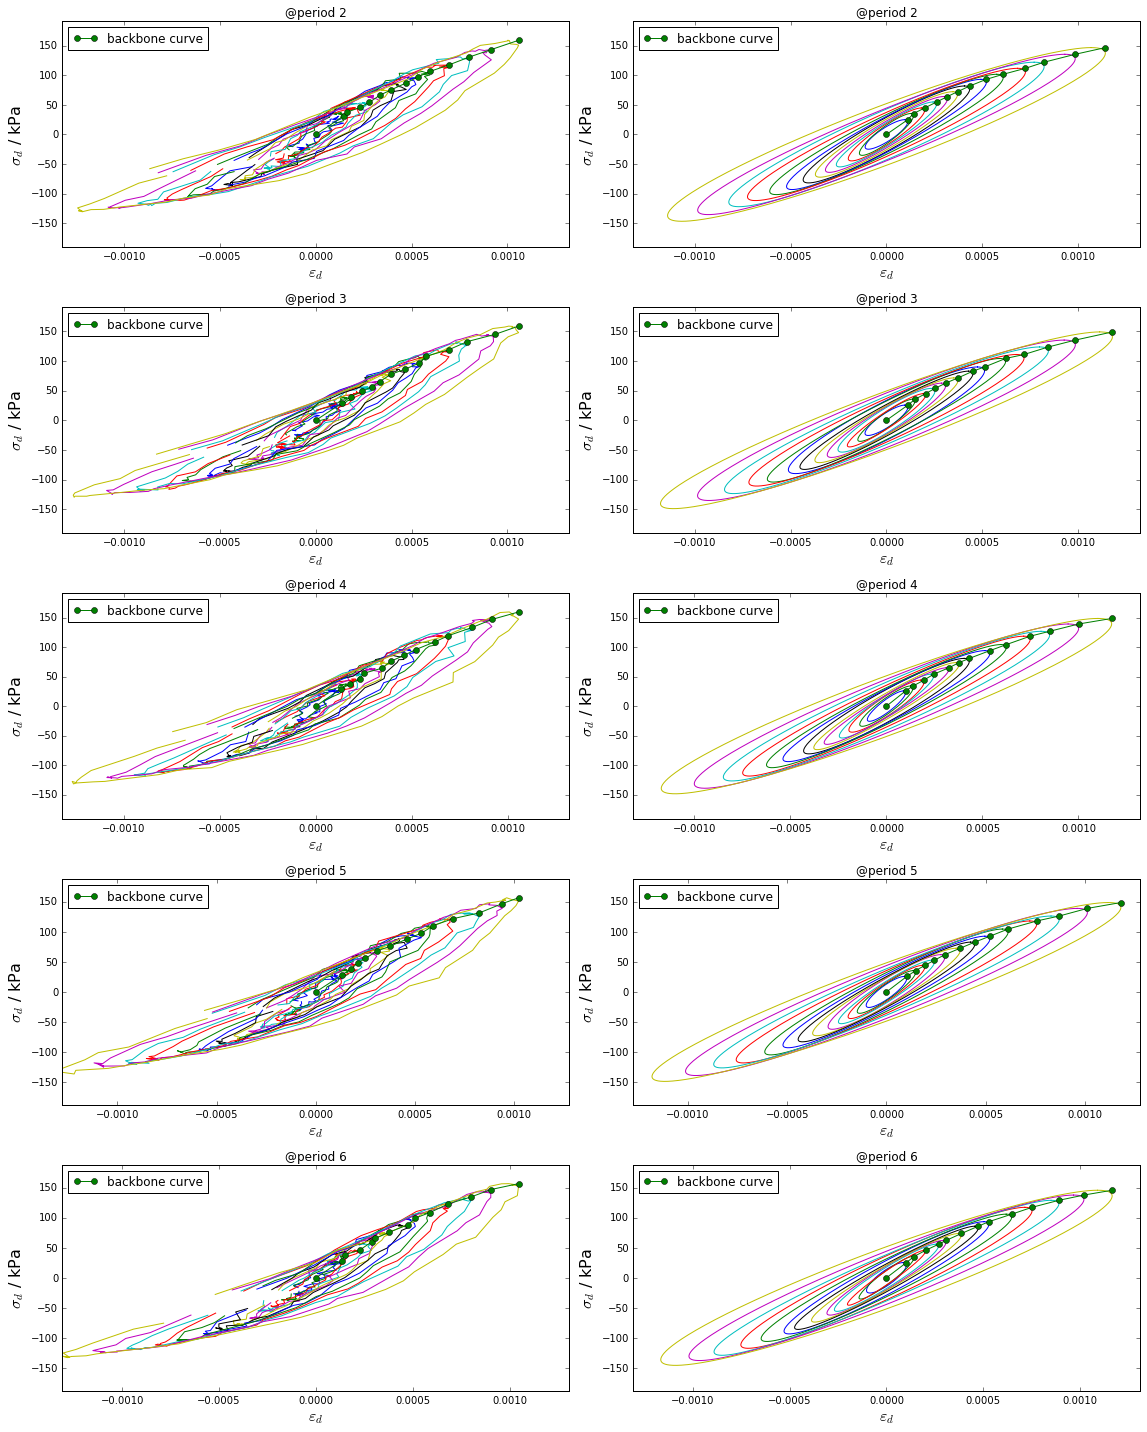

In [16]:
mdr_gen(g375_1_files)
plt.tight_layout()
plt.savefig('figs/g375_1_loops.svg')

In [17]:
def mdr_plot(csvfile_path):
    df = pd.read_csv(csvfile_path, encoding='gb2312',header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    plt.figure(figsize=(16,20),dpi=300)
    for i, col in enumerate('23456'):
        data = df[col]

        plt.subplot(5,3,3*i+1)
        plt.plot(data['epsilon_m']*100,data['sigma_m'],'go-',label='nofit')
        plt.plot(data['epsilon_m_byfit']*100,data['sigma_m_byfit'],'bo-',label='byfit')
        plt.legend(loc=0)
        plt.ylabel(r'$\sigma_m$ /kPa', fontsize=12)
        plt.xlabel(r'$\varepsilon_m$ /%', fontsize=12)
        plt.title('backbone curve @period {0}'.format(col))

        plt.subplot(5,3,3*i+2)
        plt.plot(data['epsilon_m_byfit'][1:]*1e4, data['modulus_byfit'][1:]/1000,'o',label='modulus byfit')
        plt.plot(data['epsilon_m'][1:]*1e4, data['modulus'][1:]/1000,'s',label='modulus nofit')
        plt.legend(loc=0)
        plt.ylabel(r'$E_d$ /MPa', fontsize=12)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=12)
        plt.title('elastic modulus @period {0}'.format(col))
        
        plt.subplot(5,3,3*i+3)
        plt.plot(data['epsilon_m_byfit'][1:]*1e4, data['damping_ratio_byfit'][1:]*100,'o',label='damping_ratio_byfit')
        plt.plot(data['epsilon_m'][1:]*1e4, data['damping_ratio'][1:]*100,'s',label='damping_ratio_nofit')
        plt.legend(loc=0)
        plt.ylabel(r'$\lambda_t$ /%', fontsize=12)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=12)
        plt.title('damping ratio @period {0}'.format(col))
    plt.tight_layout()

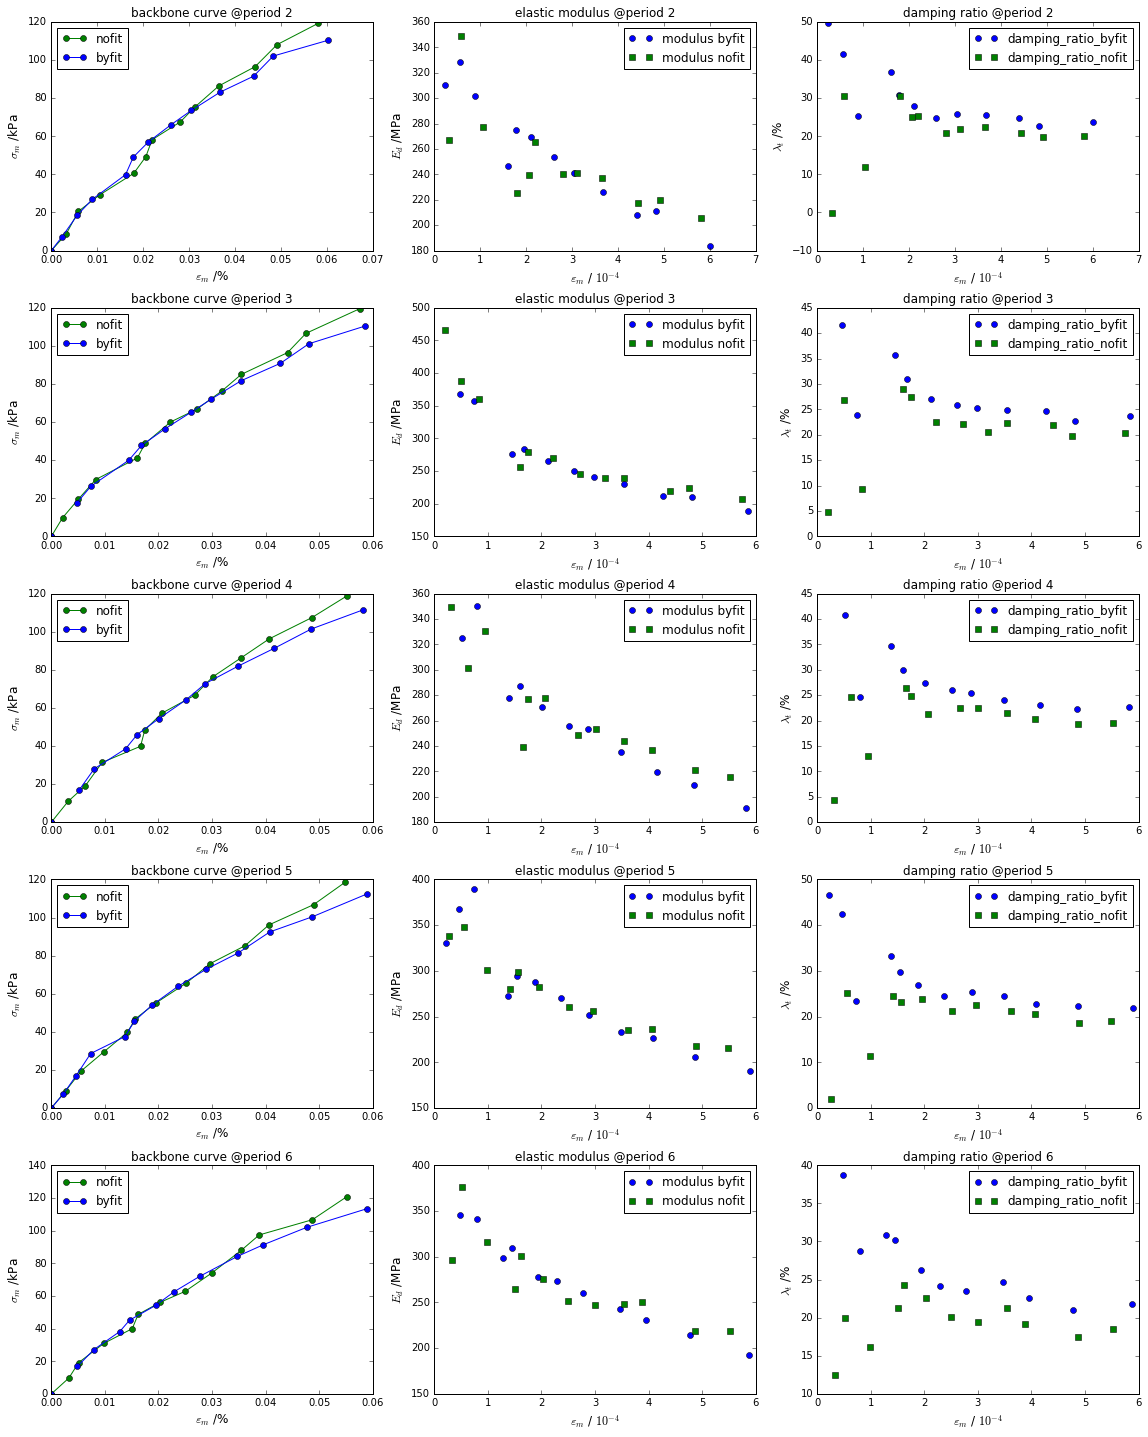

In [9]:
mdr_plot('dl_G345/datas/modulus_and_damping_ratio.csv')
plt.savefig('figs/g345_modulus_and_damping_ratio.svg')

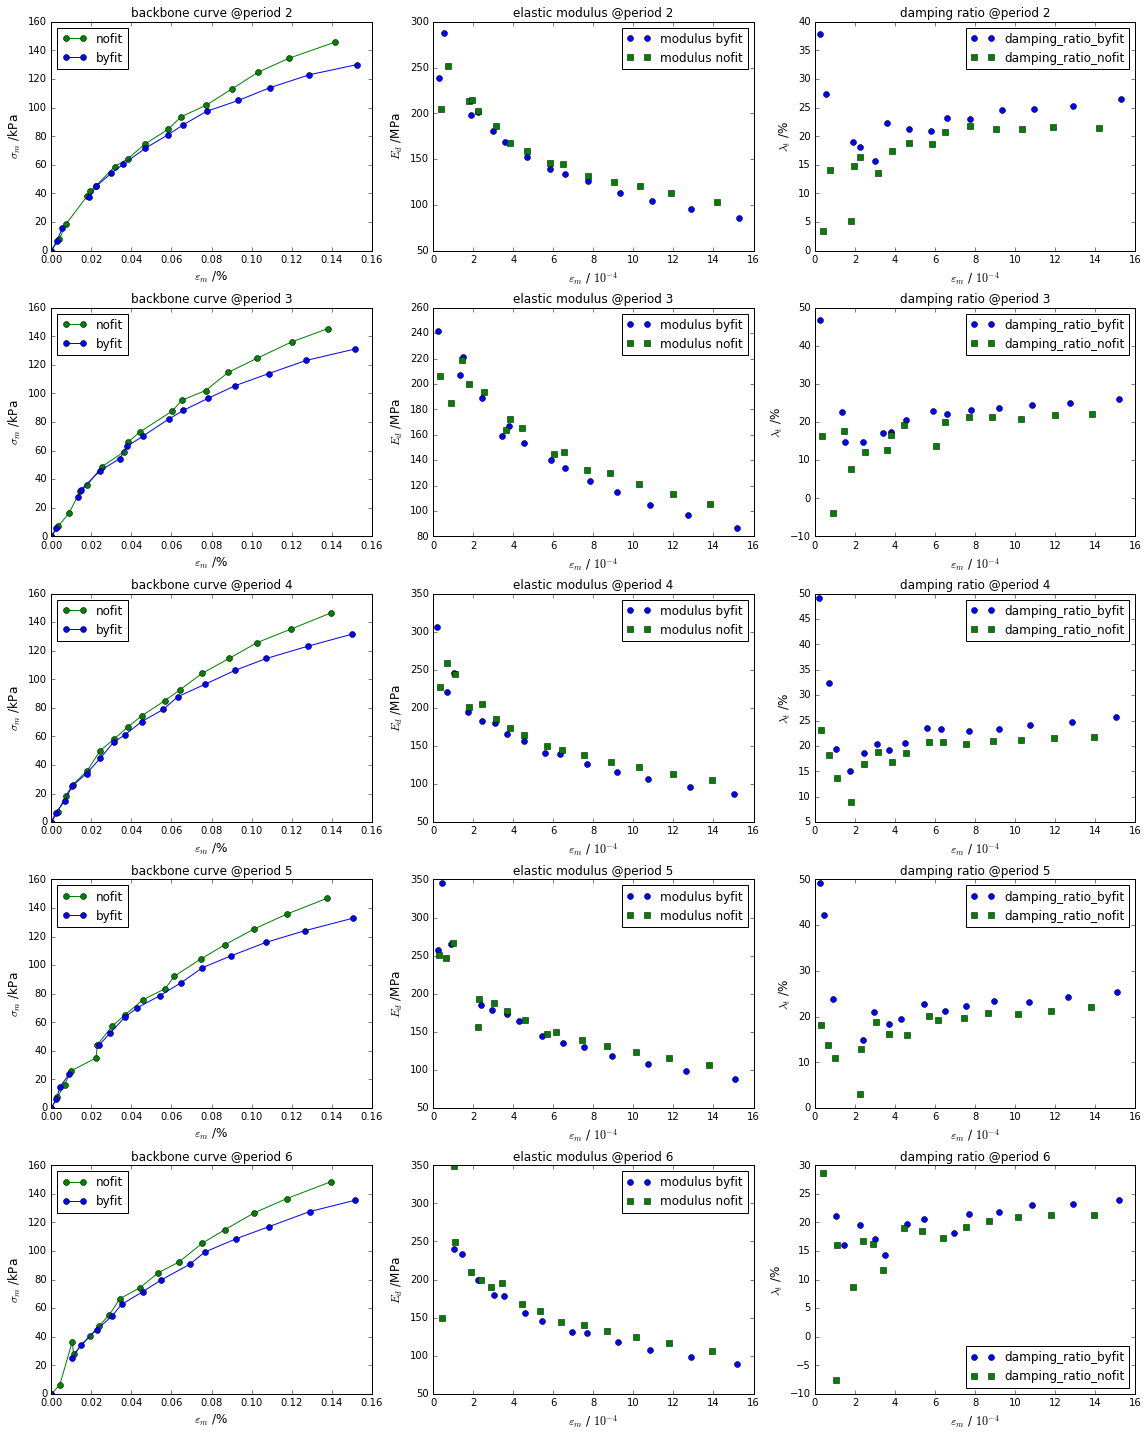

In [10]:
mdr_plot('dl_G375/datas/modulus_and_damping_ratio.csv')
plt.savefig('figs/g375_modulus_and_damping_ratio.svg')

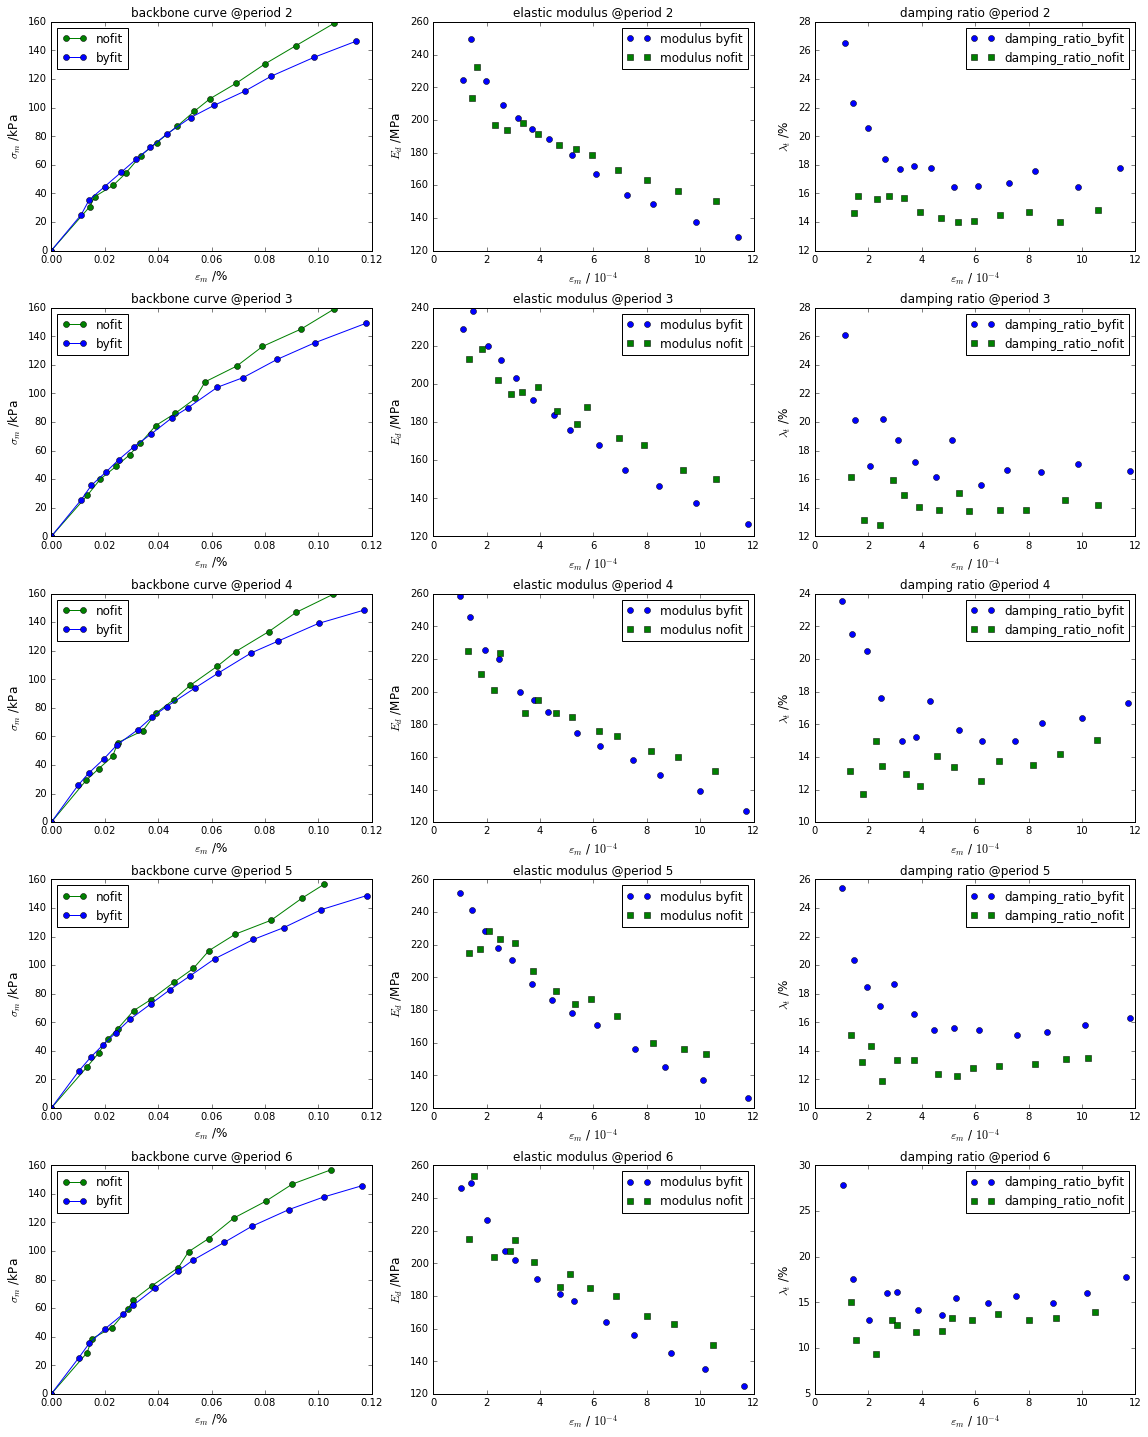

In [11]:
mdr_plot('dl_G375_1/datas/modulus_and_damping_ratio.csv')
plt.savefig('figs/g375_1_modulus_and_damping_ratio.svg')